<a href="https://colab.research.google.com/github/reidzf8/Kuliah/blob/main/DataMining/DecisionTree/DATA_MINING_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

## Import Data

Label :
0 - Extremely Weak

1 - Weak

2 - Normal

3 - Overweight

4 - Obesity

5 - Extreme Obesity

In [ ]:
df = pd.read_csv('/content/bmi.csv')
df.head()

,Jenis Kelamin,Tinggi Badan,Berat Badan,Label
0,Laki laki,174,96,4
1,Laki laki,189,87,2
2,Perempuan,185,110,4
3,Perempuan,195,104,3
4,Laki laki,149,61,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Jenis Kelamin  500 non-null    object
 1   Tinggi Badan   500 non-null    int64 
 2   Berat Badan    500 non-null    int64 
 3   Label          500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
df.shape

(500, 4)

In [ ]:
df.Label.value_counts()

,count
Label,
5,198
4,130
2,69
3,68
1,22
0,13


## 2. Cleaning Data

In [ ]:
df.isnull().sum()

,0
Jenis Kelamin,0
Tinggi Badan,0
Berat Badan,0
Label,0


In [ ]:
df.duplicated().sum()

11

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(489, 4)

## 3. EDA

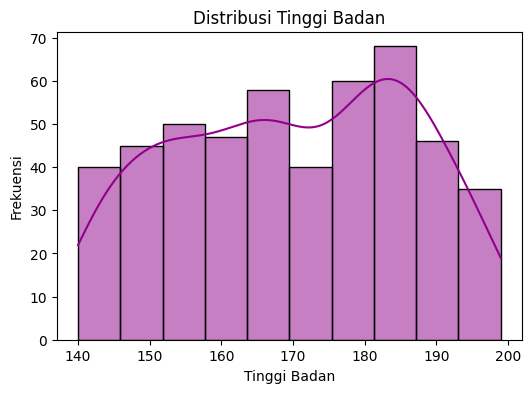

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Tinggi Badan', bins=10, kde=True, color='#91008a')
plt.title('Distribusi Tinggi Badan')
plt.xlabel('Tinggi Badan')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
fig=px.sunburst(df,path=['Jenis Kelamin', 'Label'],values=df.value_counts().values, color_discrete_sequence=['#F66095', '#2BCDC1'])
fig.show()

## 4. Prepocessing Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
jk_encoder = LabelEncoder()
df ['Jenis Kelamin'] = jk_encoder.fit_transform(df['Jenis Kelamin'])

In [ ]:
df.head()

,Jenis Kelamin,Tinggi Badan,Berat Badan,Label
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


In [ ]:
X = df.drop(columns=['Label'])
y = df['Label']
print("X", X.shape)
print("y", y.shape)

X (489, 3)
y (489,)


In [ ]:
# standarized
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Splitting Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

## 5. Modeling & Evaluation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

decision_tree_acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Akurasi Model Decision Tree: {:.2f}%'.format(decision_tree_acc * 100))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      0.50      0.50         2
           2       0.76      0.87      0.81        15
           3       0.67      0.67      0.67         9
           4       0.87      0.76      0.81        34
           5       0.87      0.94      0.91        36

    accuracy                           0.83        98
   macro avg       0.78      0.71      0.73        98
weighted avg       0.83      0.83      0.82        98

Akurasi Model Decision Tree: 82.65%


## 6. Testing

In [ ]:
new_data = pd.DataFrame({
    'Jenis Kelamin': ["Perempuan"],
    'Tinggi Badan': [168],
    'Berat Badan': [90]
})

In [ ]:
new_data['Jenis Kelamin'] = jk_encoder.transform(new_data['Jenis Kelamin'])

In [ ]:
new_data_scaled = scaler.transform(new_data)
prediction = clf.predict(new_data_scaled)
print("prediksi BMI : "), prediction[0]

prediksi BMI : 


(None, 4)